In [4]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
GLOBALmonthyearAc1 = pd.read_csv('queries_results/global/GLOBAL monthyear ac2 fitht count.csv', header = 0, sep=' *, *')
GLOBALmonthyearAc1["Time"]=pd.to_datetime(GLOBALmonthyearAc1['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
SAUmonthyearAc1 = pd.read_csv('queries_results/SAU/SAU monthyear ac2 fitht count.csv', header = 0, sep=' *, *')
SAUmonthyearAc1["Time"]=pd.to_datetime(SAUmonthyearAc1['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
SAUmonthyearAc1 = SAUmonthyearAc1.\
    merge(GLOBALmonthyearAc1, on="Time", suffixes=('','Global'))
SAUmonthyearAc1['FightCountriesPercentage']=SAUmonthyearAc1['FightCountries']/SAUmonthyearAc1['FightCountriesGlobal']*100

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


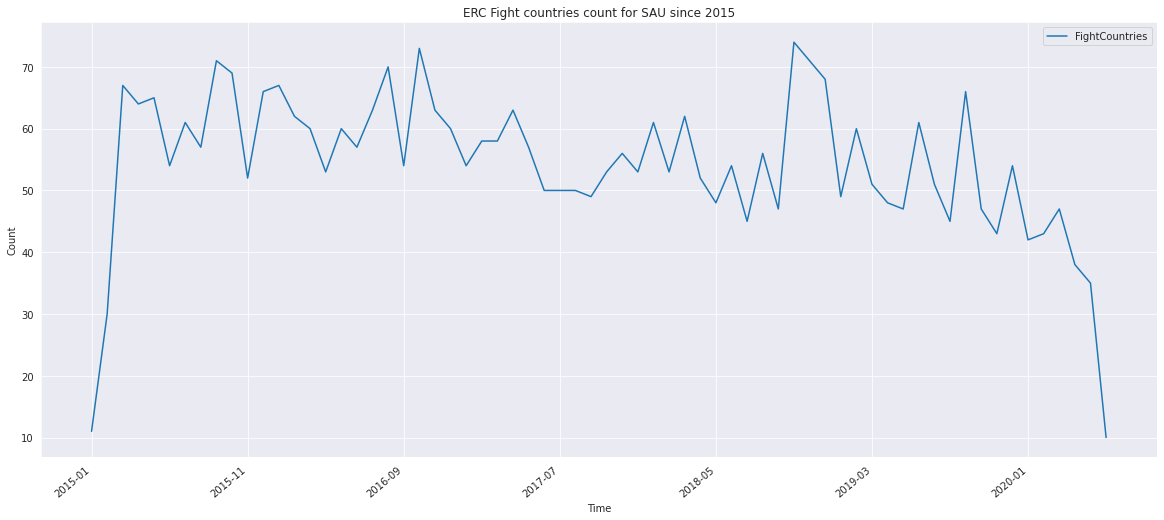

In [6]:
s = SAUmonthyearAc1
s = s.groupby(["Time"]).agg({'FightCountries':'sum'})
g = s.plot()
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.set_title("ERC Fight countries count for SAU since 2015")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

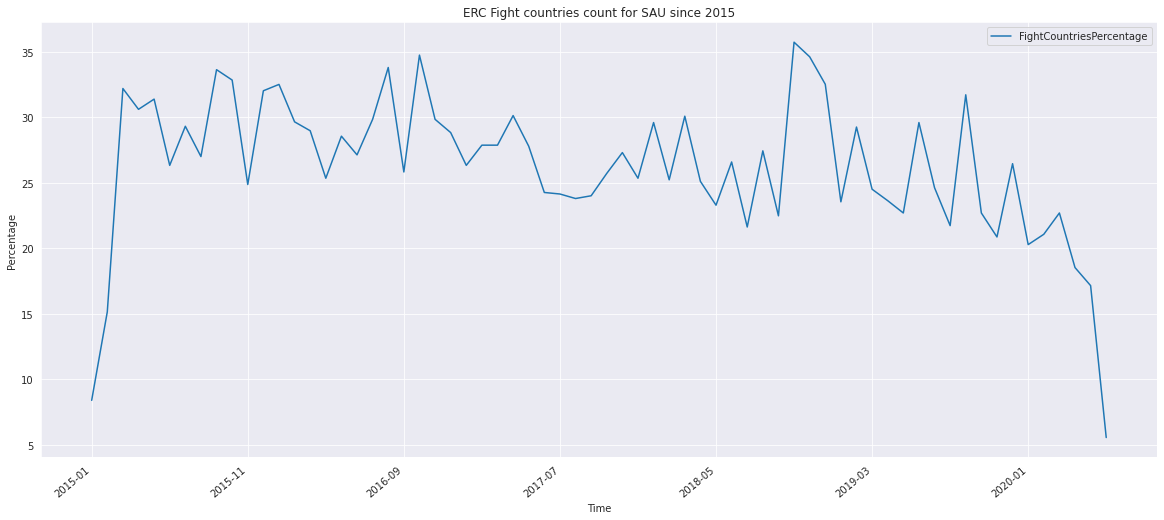

In [7]:
s = SAUmonthyearAc1
s = s.groupby(["Time"]).agg({'FightCountriesPercentage':'sum'})
g = s.plot()
g.set_title("ERC Fight countries count for SAU since 2015")
g.set(ylabel='Percentage')
g.set(xlabel='Time')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)